<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_dl/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 載入資料
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
# 看一下載入資料的數量跟尺寸 .shape 看每一個維度的數量
print('x_train' ,x_train.shape)
print('y_train' ,y_train.shape)
print('x_test' ,x_test.shape)
print('y_test' ,y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


In [4]:
# 分類的類型
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

bird


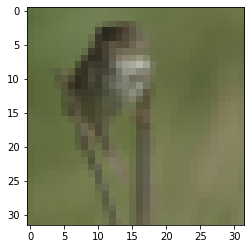

In [5]:
# mnist y_train的shape是 : (60000, ) 代表裡面的資料是長這樣 => [5, 2, 1, 0]
# cifar的y_train shape 是（50000，1）代表裡面的資料是長這樣 => [[5], [2], [1], [0], ......]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [6]:
# Conv3D 從4維變成3維，只有長x寬x高 配合3D圖片
# Conv2D 從3維變成2維，有長x寬，配合圖片
# Conv1D 從2維變成1維，只有長
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 參數數量：3 * 3 * 3深度 (一個kernal_size) * 64 + 64 = 1792 個
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 參數數量：3 * 3 * 64深度 (一個kernal_size) * 128 + 128 = 73856 個
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    # 參數數量：128 * 10 + 10(bias) =1290
    # 參數數量：64 * 10 + 10(bias) = 650
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [7]:
# 將模型最後進行compile，透過稀疏矩陣，減少消耗的ram
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [8]:
#圖片處理
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
# 將資料丟進去模型進行訓練
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 35s - loss: 1.6789 - accuracy: 0.3817 - val_loss: 1.3256 - val_accuracy: 0.5138
Epoch 2/100
225/225 - 3s - loss: 1.2446 - accuracy: 0.5544 - val_loss: 1.0601 - val_accuracy: 0.6238
Epoch 3/100
225/225 - 3s - loss: 1.0395 - accuracy: 0.6342 - val_loss: 0.9326 - val_accuracy: 0.6714
Epoch 4/100
225/225 - 3s - loss: 0.9238 - accuracy: 0.6771 - val_loss: 0.8362 - val_accuracy: 0.7106
Epoch 5/100
225/225 - 3s - loss: 0.8213 - accuracy: 0.7132 - val_loss: 0.7834 - val_accuracy: 0.7288
Epoch 6/100
225/225 - 3s - loss: 0.7400 - accuracy: 0.7425 - val_loss: 0.7362 - val_accuracy: 0.7474
Epoch 7/100
225/225 - 3s - loss: 0.6604 - accuracy: 0.7690 - val_loss: 0.7324 - val_accuracy: 0.7484
Epoch 8/100
225/225 - 3s - loss: 0.6059 - accuracy: 0.7874 - val_loss: 0.7157 - val_accuracy: 0.7588
Epoch 9/100
225/225 - 3s - loss: 0.5416 - accuracy: 0.8094 - val_loss: 0.6970 - val_accuracy: 0.7646
Epoch 10/100
225/225 - 3s - loss: 0.4842 - accuracy: 0.8294 - val_loss: 0.6838 - val_accur

In [10]:
# 模型訓練好後，將測試資料丟進去模型進行驗證
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7265 - accuracy: 0.7607


[0.7265444397926331, 0.760699987411499]

In [14]:
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000,)


In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba => predict
# predict => predice_classes
# 只要在tensorflow：就帶ont-hot encoding過後的值
# 不在：帶原本的y_test
model.predict(x_test_norm) # 預測的機率
pre = model.predict_classes(x_test_norm) # 選出機率最高的
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),760,9,45,27,25,10,5,19,67,33
automobile(正確),11,839,8,9,3,5,5,5,20,95
bird(正確),45,3,639,74,85,68,37,34,6,9
cat(正確),9,6,41,582,61,206,35,39,7,14
deer(正確),8,2,50,53,732,43,30,73,8,1
dog(正確),4,1,37,131,41,704,10,65,5,2
frog(正確),2,6,35,73,33,36,795,8,5,7
horse(正確),6,0,17,25,39,53,3,845,1,11
ship(正確),42,19,13,24,4,8,7,5,859,19
truck(正確),20,48,8,27,2,6,6,12,19,852


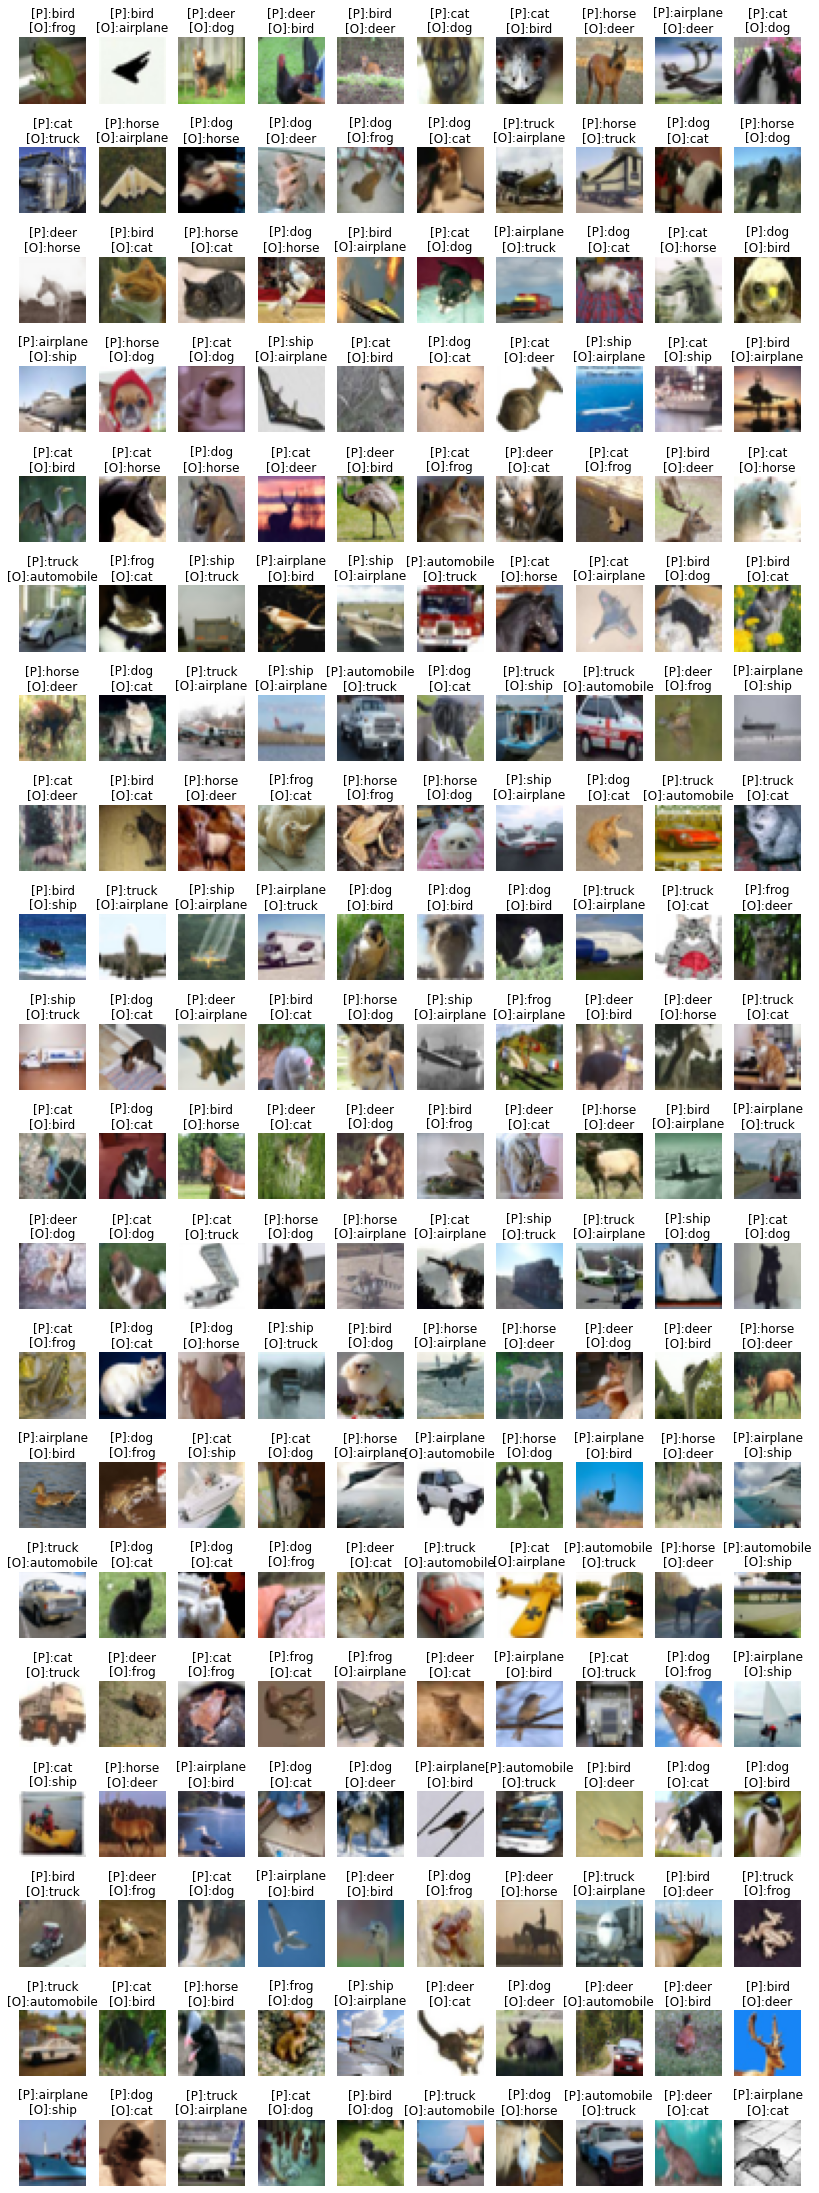

In [15]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0] # 預測錯誤的index們
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx] # 預測錯誤的，是預測成什麼
false_label = y_test_r[idx] # 預測錯誤的正確值應該是什麼
false_img = x_test[idx] # 被預測錯誤的圖片們

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])
